In [1]:
from pathlib import Path
from IPython.display import Image

from data_utils import load_params, load_results, convert_test_scores_to_sample_scores
from eval import calculate_cf_matrix, plot_cf_matrix

# Load data

In [2]:
# import parameters
params_path = Path('./params.yml')
import_params = load_params(params_path)

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

,image_name,category,sample,revolution,trigger,prediction,truth
0,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
1,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
2,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
3,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
4,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1467,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
1468,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
1469,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,good,NaN,NaN,NaN,0,0
1470,/home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...,bad,NaN,NaN,NaN,1,1


# Filter categories and save data frame

In [9]:
# filter relevant categories
include_categories = [
    'good',
    'bad'
]

df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
path_image_based_csv = r'C:\Users\1699\Repositories\ai_results_viz\ai_pipeline_export\data\image_based_cf_matrix.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

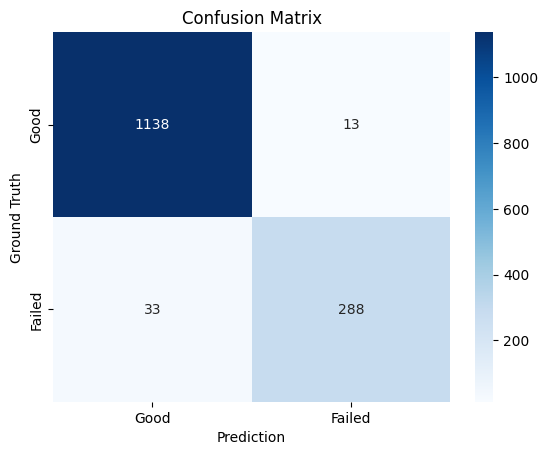

In [4]:
# evaluation parameters
prediction_class_to_value_map = {'Good': 0, 'Failed': 1}
prediction_classes = ['Good', 'Failed']

# creating confusion matrix
y_true = df_results_image_based.truth
y_pred = df_results_image_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
workspace_path = Path(r'C:\Users\1699\Repositories\ai_results_viz\ai_pipeline_export\data')
save_path_cf_matrix = workspace_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

# Sample-based evaluation

In [10]:
df_results_sample_based = convert_test_scores_to_sample_scores(df_results_image_based)
df_results_sample_based

prediction  truth
category                 sample revolution                   
Airline                  1      1                    0      0
                                2                    0      0
                                3                    0      0
                                4                    0      0
                                5                    0      0
...                                                ...    ...
Verschmutzung am Stopfen 75     6                    0      0
                                7                    0      0
                                8                    0      0
                                9                    0      0
                                10                   1      0

[8750 rows x 2 columns]

In [11]:
# save sample based data frame to csv file
save_path_sample_based_csv= workspace_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

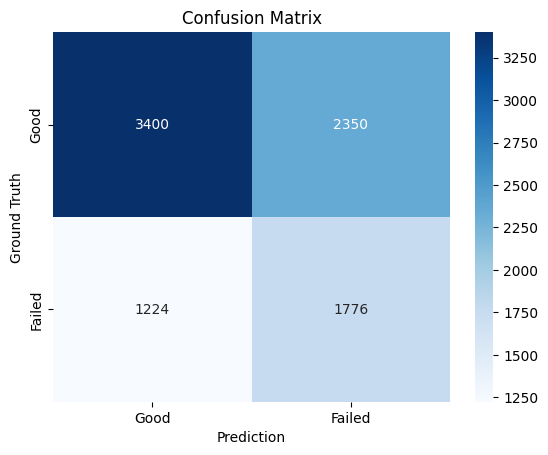

In [12]:
# creating confusion matrix
y_true = df_results_sample_based.truth
y_pred = df_results_sample_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
save_path_cf_matrix = workspace_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)